In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ecgs/

!unzip /content/drive/MyDrive/ecgdata.zip -d .

Streaming output truncated to the last 5000 lines.
  inflating: ./data/train/Premature Ventricular Contractions/fig_1532.png  
  inflating: ./data/train/Premature Ventricular Contractions/fig_1533.png  
  inflating: ./data/train/Premature Ventricular Contractions/fig_1534.png  
  inflating: ./data/train/Premature Ventricular Contractions/fig_1535.png  
  inflating: ./data/train/Premature Ventricular Contractions/fig_1536.png  
  inflating: ./data/train/Premature Ventricular Contractions/fig_1537.png  
  inflating: ./data/train/Premature Ventricular Contractions/fig_1538.png  
  inflating: ./data/train/Premature Ventricular Contractions/fig_1539.png  
  inflating: ./data/train/Premature Ventricular Contractions/fig_154.png  
  inflating: ./data/train/Premature Ventricular Contractions/fig_1540.png  
  inflating: ./data/train/Premature Ventricular Contractions/fig_1541.png  
  inflating: ./data/train/Premature Ventricular Contractions/fig_1542.png  
  inflating: ./data/train/Premature Ve

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train_path = "/content/drive/MyDrive/ECG/ECG_dataset/train"
test_path = "/content/drive/MyDrive/ECG/ECG_dataset/test"

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
x_train = train_datagen.flow_from_directory("/content/drive/MyDrive/ECG/ECG_dataset/train",target_size = (64,64),batch_size = 32,class_mode = "categorical")
x_test = test_datagen.flow_from_directory("/content/drive/MyDrive/ECG/ECG_dataset/test",target_size = (64,64),batch_size = 32,class_mode = "categorical")

Found 15361 images belonging to 6 classes.
Found 7326 images belonging to 6 classes.


In [7]:
x_train.class_indices

{'Left Bundle Branch Block': 0,
 'Normal': 1,
 'Premature Atrial Contraction': 2,
 'Premature Ventricular Contractions': 3,
 'Right Bundle Branch Block': 4,
 'Ventricular Fibrillation': 5}

In [8]:
#model Arcitecture
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape = (64,64,3),activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))
model.add(Dense(units = 6,kernel_initializer = "random_uniform",activation = "softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit_generator(generator=x_train,steps_per_epoch = len(x_train), epochs=10, validation_data=x_test,validation_steps = len(x_test))

<ipython-input-11-da6b799e739e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=x_train,steps_per_epoch = len(x_train), epochs=10, validation_data=x_test,validation_steps = len(x_test))


Epoch 1/10
481/481 [==============================] - 5135s 11s/step - loss: 0.7774 - accuracy: 0.7131 - val_loss: 0.5505 - val_accuracy: 0.8447
Epoch 2/10
481/481 [==============================] - 199s 414ms/step - loss: 0.2006 - accuracy: 0.9396 - val_loss: 0.4268 - val_accuracy: 0.8664
Epoch 3/10
481/481 [==============================] - 191s 396ms/step - loss: 0.1243 - accuracy: 0.9613 - val_loss: 0.5105 - val_accuracy: 0.8574
Epoch 4/10
481/481 [==============================] - 198s 412ms/step - loss: 0.0943 - accuracy: 0.9695 - val_loss: 0.4752 - val_accuracy: 0.8718
Epoch 5/10
481/481 [==============================] - 200s 416ms/step - loss: 0.0759 - accuracy: 0.9749 - val_loss: 0.8176 - val_accuracy: 0.8518
Epoch 6/10
481/481 [==============================] - 192s 400ms/step - loss: 0.0631 - accuracy: 0.9801 - val_loss: 0.5570 - val_accuracy: 0.8634
Epoch 7/10
481/481 [==============================] - 196s 407ms/step - loss: 0.0565 - accuracy: 0.9819 - val_loss: 0.5644 - 

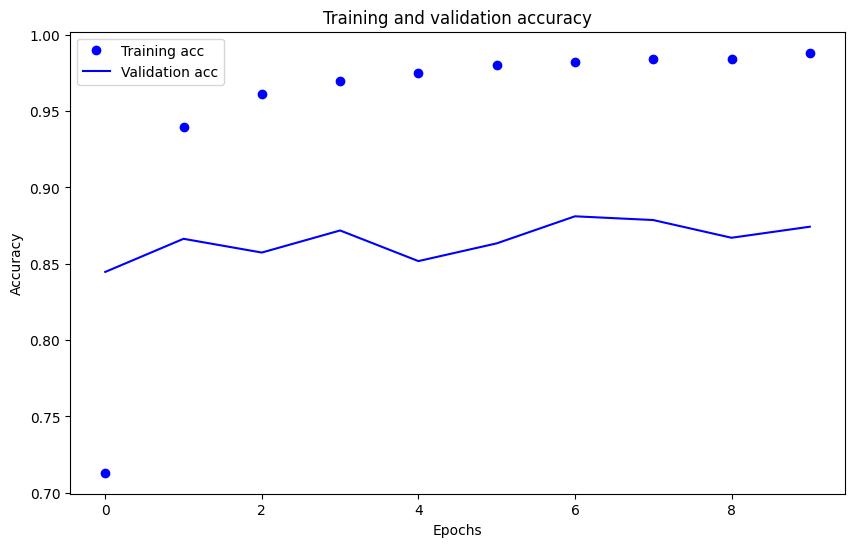

In [13]:
# Get training and validation accuracy from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get number of epochs
epochs = range(len(acc))

# Create a figure with a single subplot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

# Plot training and validation accuracy
ax.plot(epochs, acc, 'bo', label='Training acc')
ax.plot(epochs, val_acc, 'b', label='Validation acc')

# Add labels, title, and legend
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_title('Training and validation accuracy')
ax.legend()

# Show the plot
plt.show()


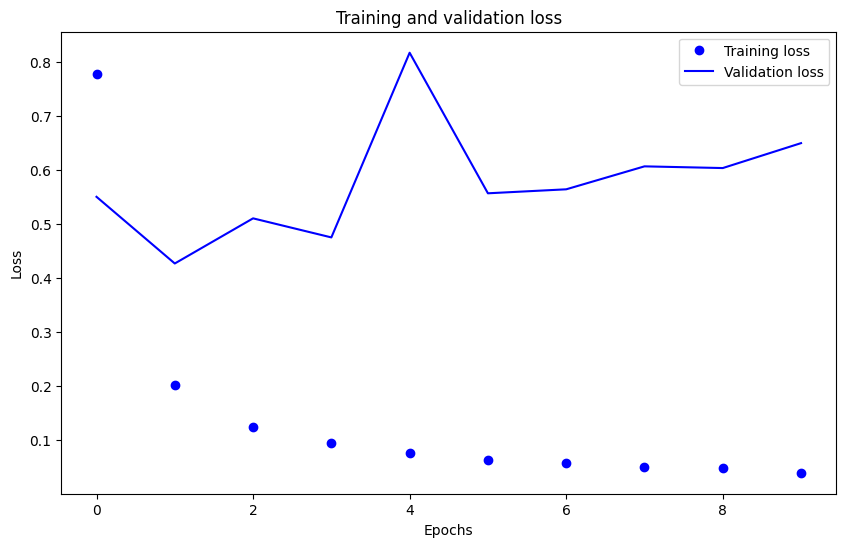

In [14]:
# Get training and validation loss from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(loss))

# Create a figure with a single subplot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

# Plot training and validation loss
ax.plot(epochs, loss, 'bo', label='Training loss')
ax.plot(epochs, val_loss, 'b', label='Validation loss')

# Add labels, title, and legend
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Training and validation loss')
ax.legend()

# Show the plot
plt.show()


In [17]:
#Saving Model.
model.save('/content/drive/MyDrive/ECG/ECGnewest.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


229/229 [==============================] - 44s 189ms/step


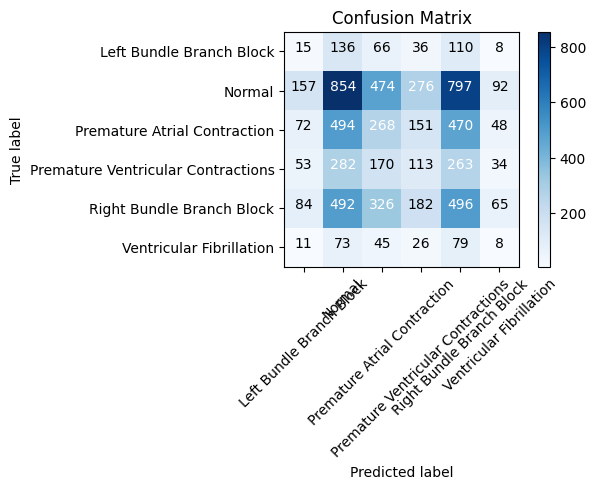

In [18]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

# Get the predictions from the model
y_pred = model.predict(x_test)

# Get the true labels
y_true = x_test.classes

# Get the class labels
class_labels = list(x_test.class_indices.keys())

# Create the confusion matrix
cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Fill the matrix with the values
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > np.mean(cm) else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/drive/MyDrive/ecgs/ECGnewest.h5')

In [ ]:
img=image.load_img("/content/drive/MyDrive/ecgs/test.png",target_size=(64,64))

In [ ]:
x=image.img_to_array(img)

In [ ]:
import numpy as np

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
pred = model.predict(x)
y_pred=np.argmax(pred)
y_pred

1/1 [==============================] - 0s 281ms/step


1

In [ ]:
index=['left Bundle Branch block',
       'Normal',
       'Premature Atrial Contraction',
       'Premature Ventricular Contraction',
       'Right Bundle Branch Block',
       'Ventricular Fibrillation']
result = str(index[y_pred])
result

'Normal'